In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import savgol_filter
import os 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


In [ ]:
#linear regression 

from sklearn.linear_model import LinearRegression
def linear(X ,Y) : 
  # define model
  model = LinearRegression()
  # fit model
  model.fit(X, Y)
  return model

In [ ]:
# k_neighbors regression 

from sklearn.neighbors import KNeighborsRegressor 
def k_neighbors(X ,Y ) : 

  model = KNeighborsRegressor()
  model.fit(X ,Y)
  return model

In [ ]:
#dission tree 

from sklearn.tree import DecisionTreeRegressor 
def tree(X, Y) : 
  model = DecisionTreeRegressor() 
  model.fit (X ,Y )
  return model

In [ ]:
def GBR(X, Y) : 
  model = GradientBoostingRegressor() 
  model.fit (X ,Y )
  return model


In [ ]:
from sklearn.multioutput import RegressorChainLinearSVR()
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
def Chained_SVM(X ,Y) : 
  # define base model
  model = GradientBoostingRegressor()
  # define the chained multioutput wrapper model
  wrapper = RegressorChain(model)
  # fit the model on the whole dataset
  wrapper.fit(X, Y)
  return wrapper


SyntaxError: ignored

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
def Direct_SVM(X ,Y) : 
  # define base model
  model = GradientBoostingRegressor
  # define the direct multioutput wrapper model
  wrapper = MultiOutputRegressor(model)
  # fit the model on the whole dataset
  wrapper.fit(X, Y)
  return wrapper



In [ ]:
def indice_max(signal) : 
  max = signal.max()
  index = np.where(signal == max ) 
  return index[0][0]
def indice_min(signal) : 
  min = signal.min()
  index = np.where(signal ==min ) 
  return index[0][0]

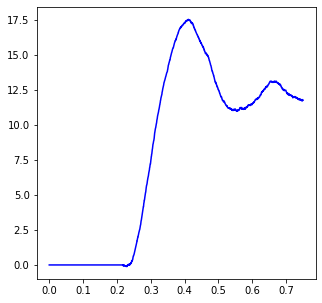

test350-30.xlsx done


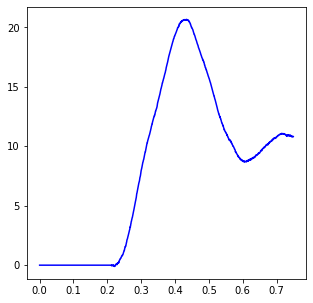

test500-30.xlsx done


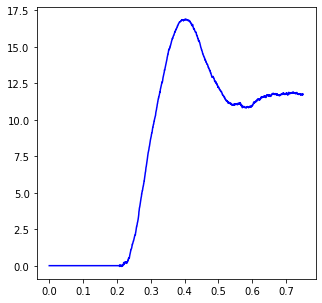

test550-30.xlsx done


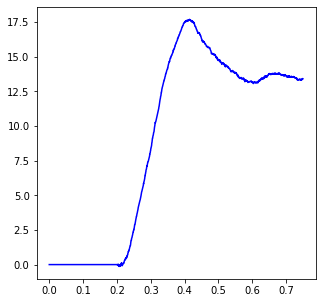

test600-30.xlsx done


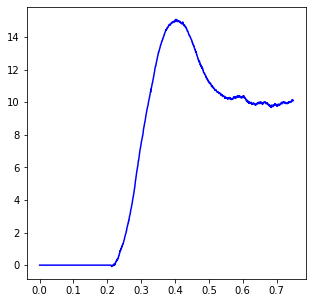

test450-30.xlsx done


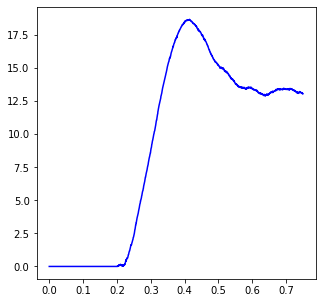

test400-30.xlsx done


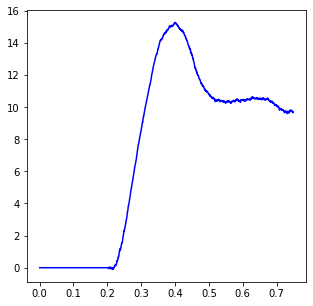

test300-30.xlsx done


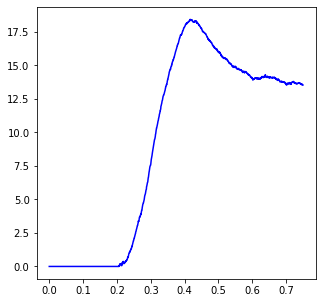

test250-30.xlsx done


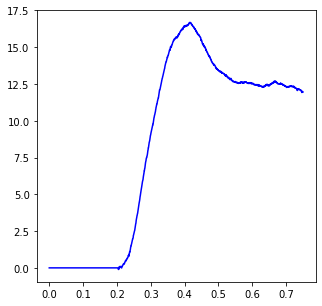

test200-30.xlsx done


KeyboardInterrupt: ignored

In [ ]:
#data preparation for lstm 
X = [] 
Y = []
drop_list = []
count = 0 
for file in os.listdir('/content/drive/My Drive/Condidat1') : 
  
  path = os.path.join("/content/drive/My Drive/Condidat1" , file)
  xls = pd.ExcelFile(path)
  df1 = pd.read_excel(xls,sheet_name=2 , skiprows=7)
  df1 = df1[df1.columns[1] ]
  X1 = df1.to_numpy()
  #X.append(X1)
  df2 = pd.read_excel(xls, sheet_name=1, skiprows=7)
  df2 = df2 [df2.columns[1]]
  Y1 = df2.to_numpy()
  #Y.append(Y1)

  df_temp = pd.read_excel(xls , 1 , skiprows= 7 , )
  df_temp = df_temp[df_temp.columns[0]]
  X_temp = df_temp.to_numpy()
  
  
  #indice min et max 
  X_max = X1.max()
  ind_X_max = indice_max(X1)
  X_min = X1.min()
  ind_X_min = indice_min(X1)

  X_f = savgol_filter(X1, 51, 3) # window size 51, polynomial order 3
   # window size 51, polynomial order 3

  X2= X1 [ind_X_max-500:ind_X_max+1000]
  Y2 = Y1 [ind_X_max-500:ind_X_max+1000]

  indi = 0 
  while Y2[indi+100] - Y2[indi] <2.5 and indi < 3000 : 
    indi = indi+1 
  Y2[:indi] = Y2[indi]
  Y5 = Y2 - Y2[0]
  X5 = X2 - X2[0]
  

  count = count +1


  if count in drop_list : 
    continue

  #saving 
  X.append(X5)
  Y.append(Y5)
  #plot
  plt.figure(figsize=(5,5))
  plt.plot(X_temp[:1500],Y5, '-b')

  plt.show()



  print (file,'done')

In [ ]:
X = np.array(X)
Y = np.array(Y)
X.shape

(86, 1500)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X ,Y , test_size  = 0.1 , random_state =2)

In [ ]:
# Call models

model = linear(X_train ,Y_train)
model1 = tree(X_train ,Y_train)
model2 = k_neighbors(X_train ,Y_train)



In [ ]:
model3 = Direct_SVM(X_train , Y_train)

TypeError: ignored

In [ ]:
model4 = Chained_SVM(X_train , Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

KeyboardInterrupt: ignored

In [ ]:
pip creme


TypeError: ignored

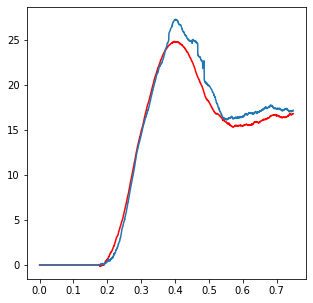

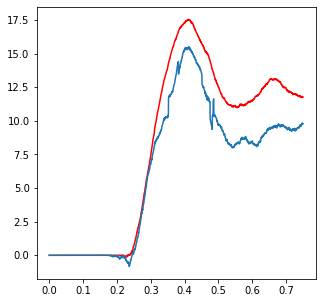

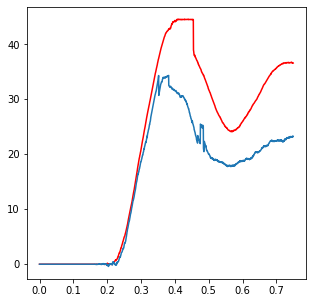

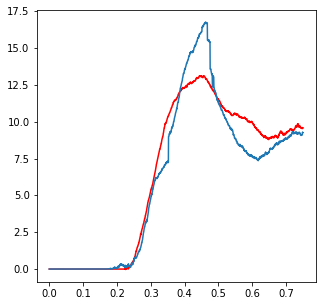

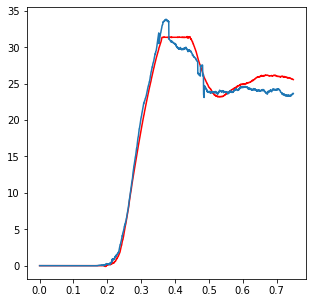

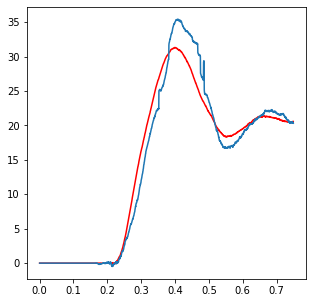

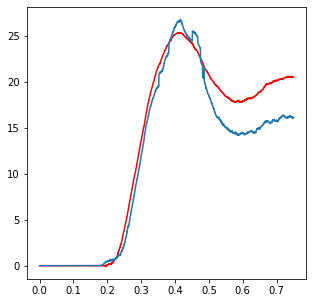

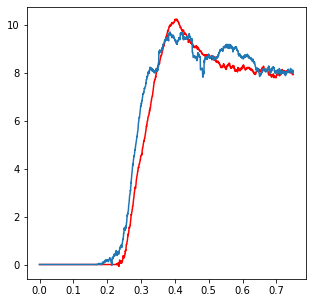

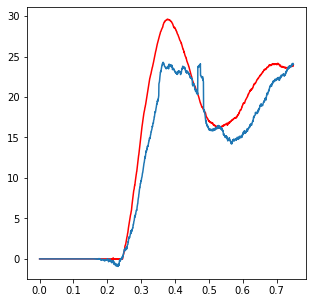

In [ ]:
# make  , a prediction
for i in range (X_test.shape[0]) : 
  row = X_test[i]
  yhat = model.predict([row])

  plt.figure(figsize=(5,5))
    
  plt.plot(X_temp[:1500] , Y_test[i] , '-r')
  plt.plot(X_temp[:1500] , yhat[0] )

  plt.show()

In [ ]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores1 = cross_val_score(model1, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores2 = cross_val_score(model2, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force the scores to be positive
n_scores = absolute(n_scores)
n_scores1 = absolute(n_scores1)
n_scores2 = absolute(n_scores2)

# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('MAE: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))
print('MAE: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

MAE: 1.673 (0.336)
MAE: 1.627 (0.342)
MAE: 1.100 (0.296)
